In [58]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from collections import Counter
import scanpy as sc
import anndata as an
import sys
import os
import gc

In [59]:
folder = './tahoe-100/data/prepared/'
file = 'tahoe_bulk_processed.h5ad'
!pwd

/home/zinovyev/gits/arc-virtual-cell-atlas


In [92]:
adata = sc.read_h5ad(folder+file)
cellnumber_df = pd.read_csv('tahoe-100/data/cell_numbers/number_of_cells.tsv',sep='\t')
cellnumber_df['id'] = [row['plate']+'_'+row['cell_line']+'_'+row['MEASUREMENT'] for i,row in cellnumber_df.iterrows()]
cellnumbers = {row['id']:row['NUMBER_OF_CELLS'] for i,row in cellnumber_df.iterrows()}
cellnumbers1 = [cellnumbers[k] for k in adata.obs_names]
adata.obs['cell_number'] = cellnumbers1
readnumbers = {row['id']:row['NUMBER_OF_READS'] for i,row in cellnumber_df.iterrows()}
readnumbers1 = [readnumbers[k] for k in adata.obs_names]
adata.obs['read_number'] = readnumbers1
group_plates1 = ['plate1','plate2','plate3','plate4','plate5','plate6','plate14']
group_plates2 = ['plate7','plate8','plate9','plate10','plate11','plate12','plate13']
adata.obs['group_plate'] = [0 if p in group_plates1 else 1 for p in list(adata.obs['plate'])]
display(adata)

AnnData object with n_obs × n_vars = 61167 × 2000
    obs: 'plate', 'cellline', 'drug', 'drugconc', 'cell_number', 'read_number', 'group_plate'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [93]:
sc.tl.pca(adata)

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


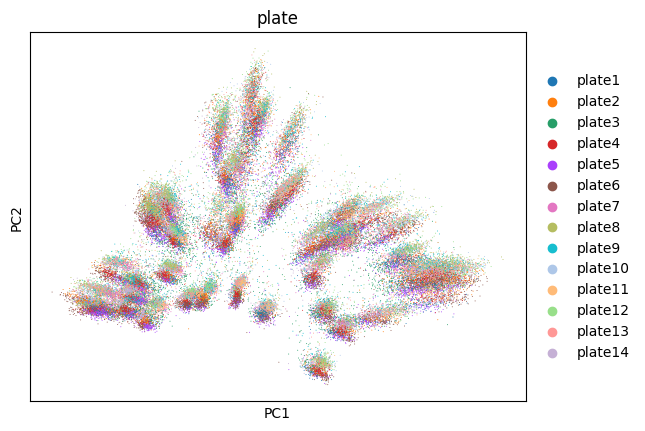

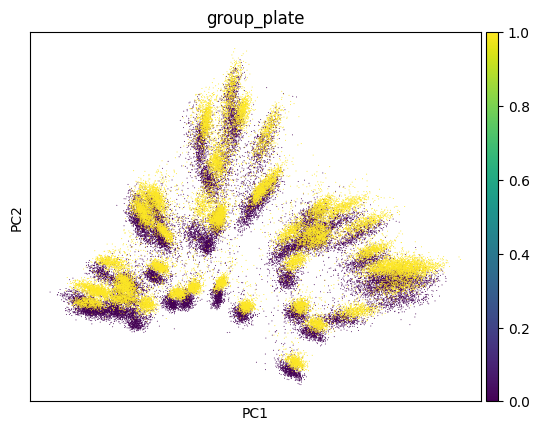

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


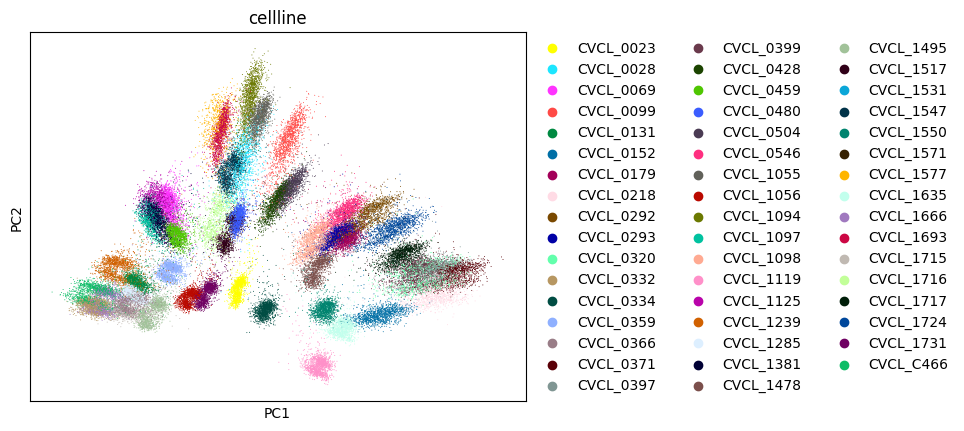

In [54]:
sc.pl.pca(adata,color='plate')
sc.pl.pca(adata,color='group_plate')
sc.pl.pca(adata,color='cellline')

In [55]:
sc.pp.neighbors(adata,n_neighbors=10)
sc.tl.umap(adata)

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


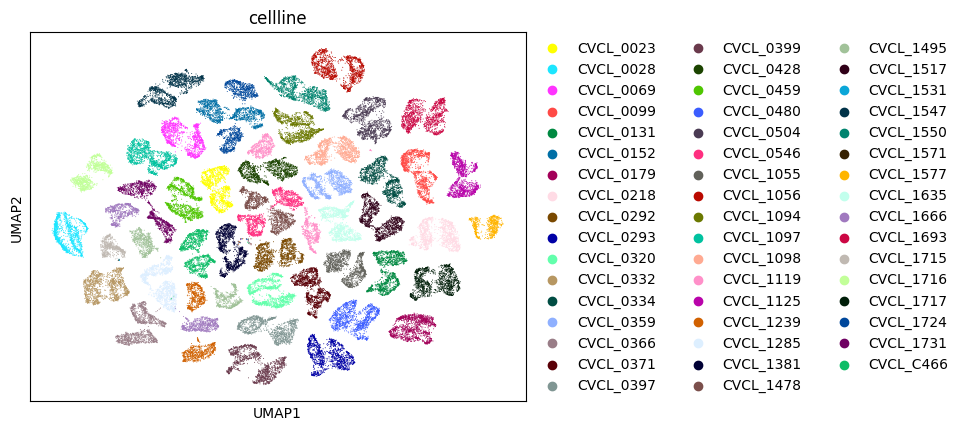

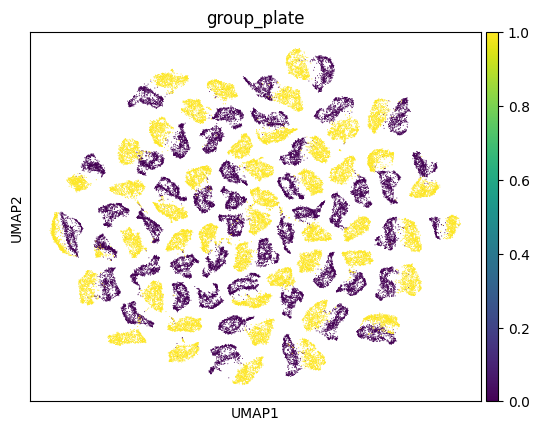

In [56]:
sc.pl.umap(adata,color='cellline')
sc.pl.umap(adata,color='group_plate')

['plate8_CVCL_0023_Lucanthone__0.5', 'plate8_CVCL_0023_Benproperine (phosphate)__0.5', 'plate8_CVCL_0023_Clofarabine__0.5', 'plate8_CVCL_0023_Dorzolamide (hydrochloride)__0.5', 'plate8_CVCL_0023_Betamethasone dipropionate__0.5', 'plate8_CVCL_0023_Verteporfin__0.5', 'plate8_CVCL_0023_Topotecan (hydrochloride)__0.5', 'plate8_CVCL_0023_Entecavir (monohydrate)__0.5', 'plate8_CVCL_0023_Procainamide (hydrochloride)__0.5', 'plate8_CVCL_0023_Pexidartinib (hydrochloride)__0.5', 'plate8_CVCL_0023_Fumaric acid__0.5', 'plate8_CVCL_0023_Macitentan__0.5', 'plate8_CVCL_0023_Tranilast__0.5', 'plate8_CVCL_0023_Tolmetin__0.5', 'plate8_CVCL_0023_(S)-Crizotinib__0.5', 'plate8_CVCL_0023_Monocrotaline__0.5', 'plate8_CVCL_0023_Bendamustine__0.5', 'plate8_CVCL_0023_Afatinib__0.5', 'plate8_CVCL_0023_Cobimetinib__0.5', 'plate8_CVCL_0023_Bisoprolol (hemifumarate)__0.5', 'plate8_CVCL_0023_Erlotinib__0.5', 'plate8_CVCL_0023_Pemetrexed__0.5', 'plate8_CVCL_0023_Belumosudil__0.5', 'plate8_CVCL_0023_Naproxen__0.5', 'p

/tmp/ipykernel_4759/1855026654.py:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cellline.obs['concentration'] = concs


AnnData object with n_obs × n_vars = 1307 × 2000
    obs: 'plate', 'cellline', 'drug', 'drugconc', 'cell_number', 'read_number', 'group_plate', 'concentration'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


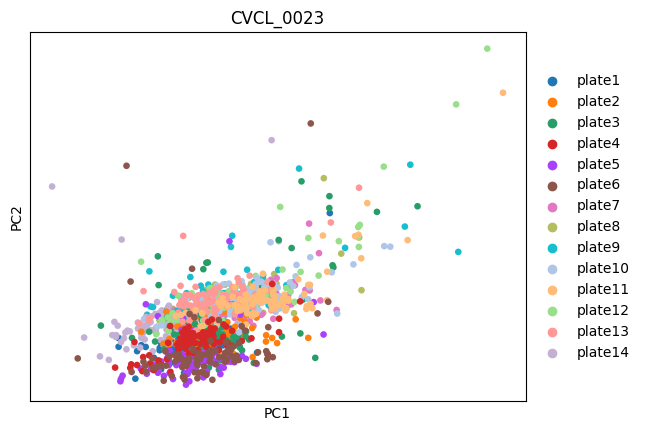

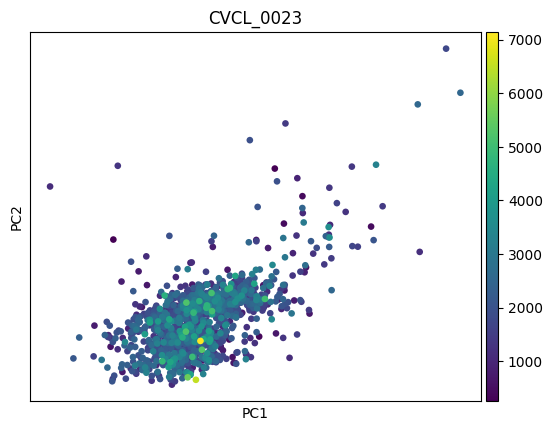

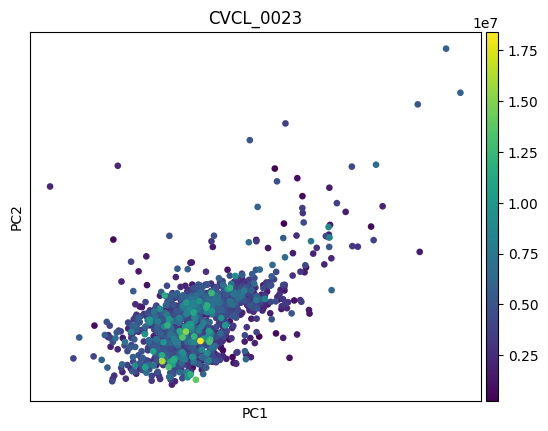

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


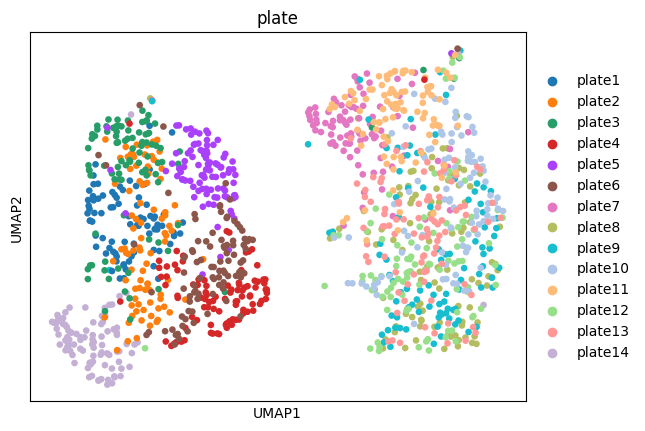

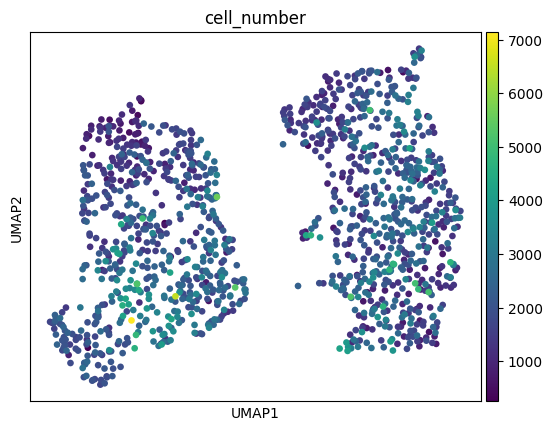

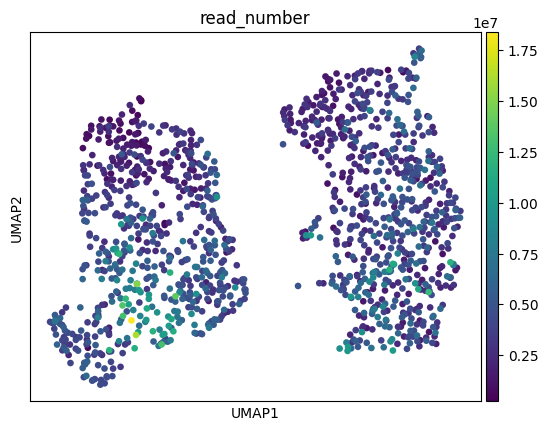

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


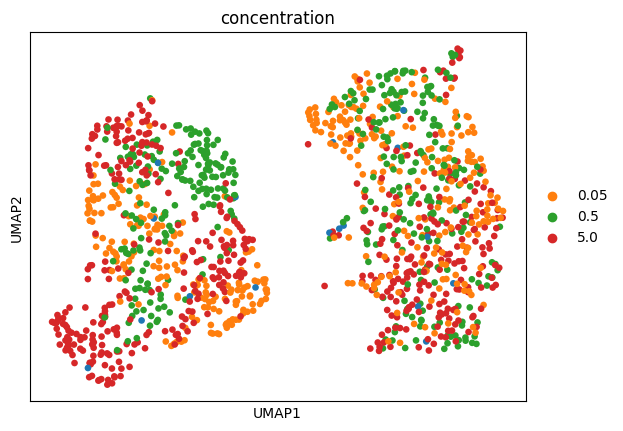

In [102]:
cellline = 'CVCL_0023'
#cellline = 'CVCL_0459'
#cellline = 'CVCL_0131'
#cellline = 'CVCL_1119'

adata_cellline = adata[adata.obs['cellline']==cellline,:]

dc = list(adata_cellline.obs_names)
print(dc)
concs = []
for d in dc:
    parts = d.split('_')
    cellline = parts[1]+'_'+parts[2]
    conc = parts[5]
    concs.append(conc)

adata_cellline.obs['concentration'] = concs

display(adata_cellline)
sc.pl.pca(adata_cellline,color='plate',title=cellline)
sc.pl.pca(adata_cellline,color='cell_number',title=cellline)
sc.pl.pca(adata_cellline,color='read_number',title=cellline)
#sc.pl.pca(adata_cellline,color='drug',title=cellline)
sc.pp.neighbors(adata_cellline,n_neighbors=10,metric='correlation')
sc.tl.umap(adata_cellline)
#sc.pl.umap(adata_cellline,color='drug')
sc.pl.umap(adata_cellline,color='plate')
sc.pl.umap(adata_cellline,color='cell_number')
sc.pl.umap(adata_cellline,color='read_number')
sc.pl.umap(adata_cellline,color='concentration')

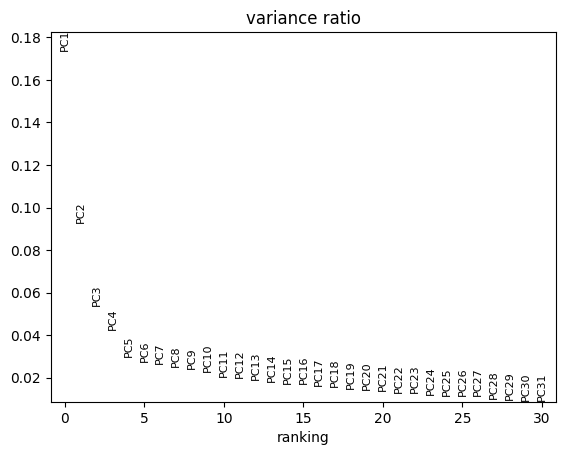

In [37]:
sc.pl.pca_variance_ratio(adata_cellline)

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


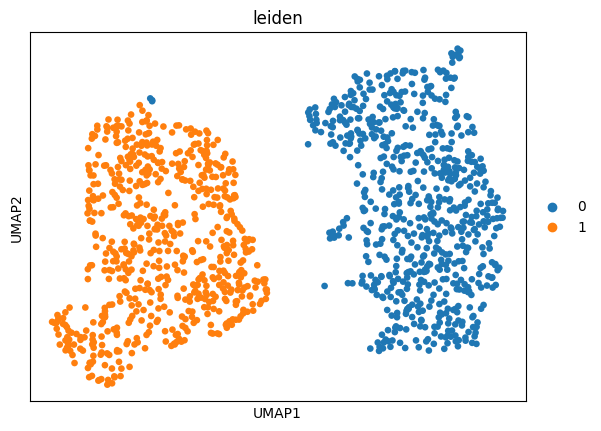

KeyError: 'Could not find key CDK1 in .var_names or .obs.columns.'

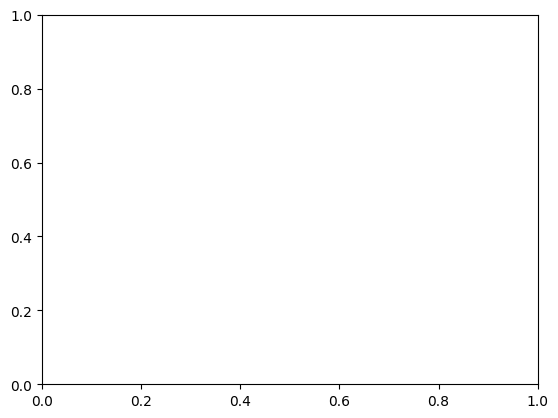

In [103]:
sc.tl.leiden(adata_cellline,resolution=0.05)
sc.pl.umap(adata_cellline,color='leiden')
sc.pl.umap(adata_cellline,color='CDK1')
sc.pl.umap(adata_cellline,color='USP3')
sc.pl.umap(adata_cellline,color='PRKD1')
sc.pl.umap(adata_cellline,color='MALAT1')

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 f

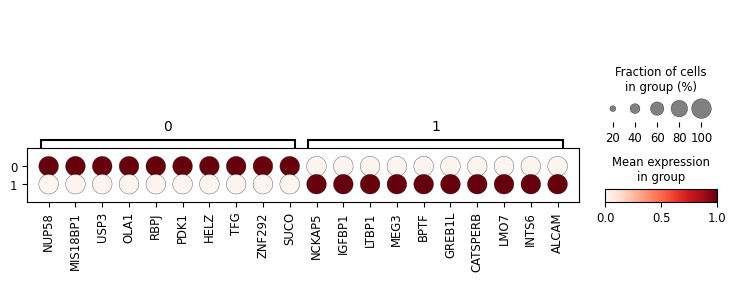

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


,names,scores,logfoldchanges,pvals,pvals_adj
0,NUP58,30.619335,1.249336,6.768012e-206,1.353602e-202
1,MIS18BP1,30.214397,0.711147,1.532475e-200,1.532475e-197
2,USP3,30.091246,1.081077,6.307657e-199,4.205105e-196
3,OLA1,29.988325,0.659442,1.393352e-197,4.309222e-195
4,RBPJ,29.986273,0.780198,1.481909e-197,4.309222e-195
5,PDK1,29.985687,1.043418,1.508228e-197,4.309222e-195
6,HELZ,29.943756,0.842782,5.305613e-197,1.326403e-194
7,TFG,29.929682,0.647443,8.089609e-197,1.797691e-194
8,ZNF292,29.708887,0.496630,5.895257e-194,7.860343e-192
9,SUCO,29.632797,0.776846,5.650773e-193,6.647968e-191


In [49]:
sc.tl.rank_genes_groups(adata_cellline, groupby="leiden", method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(
    adata_cellline, groupby="leiden", standard_scale="var", n_genes=10
)
sc.get.rank_genes_groups_df(adata_cellline, group="0").head(20)


In [67]:
adata.obs['group_plate'] = ['0' if p in group_plates1 else '1' for p in list(adata.obs['plate'])]
print(adata.obs['group_plate'])
sc.tl.rank_genes_groups(adata, groupby="group_plate", method="wilcoxon")

plate4_CVCL_0152_Temsirolimus__0.05                     0
plate4_CVCL_0152_Lenalidomide (hemihydrate)__0.05       0
plate4_CVCL_0152_Demeclocycline__0.05                   0
plate4_CVCL_0152_(R)-Verapamil (hydrochloride)__0.05    0
plate4_CVCL_0152_Neratinib (maleate)__0.05              0
                                                       ..
plate12_CVCL_1119_Idoxuridine__5.0                      1
plate12_CVCL_1119_Methotrexate__5.0                     1
plate12_CVCL_1119_Auranofin__5.0                        1
plate12_CVCL_1119_Nafamostat (mesylate)__5.0            1
plate12_CVCL_1119_Cabozantinib (S-malate)__5.0          1
Name: group_plate, Length: 61167, dtype: object


/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obse

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


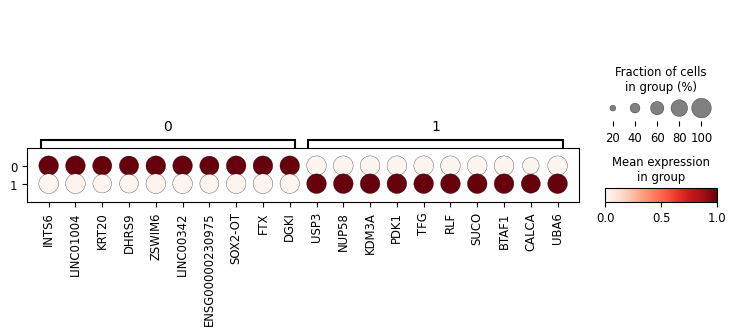

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


In [81]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="group_plate", standard_scale="var", n_genes=10
)
df_ranks = sc.get.rank_genes_groups_df(adata, group="0").head(100)


In [91]:
df_ranks = sc.get.rank_genes_groups_df(adata, group="0")
display(df_ranks)
#sns.lineplot(df_ranks,x='names',y='scores')
genesplus = [row['names'] for i,row in df_ranks.iterrows() if row['scores']>50]
for g in genesplus:
    print(g)

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


,names,scores,logfoldchanges,pvals,pvals_adj
0,INTS6,119.408257,0.770971,0.0,0.0
1,LINC01004,114.165184,0.757539,0.0,0.0
2,KRT20,110.502975,0.959717,0.0,0.0
3,DHRS9,105.466568,1.080892,0.0,0.0
4,ZSWIM6,94.880219,0.471831,0.0,0.0
...,...,...,...,...,...
1995,TFG,-128.773575,-0.562881,0.0,0.0
1996,PDK1,-133.551056,-0.740418,0.0,0.0
1997,KDM3A,-135.217163,-0.588154,0.0,0.0
1998,NUP58,-142.625870,-0.742937,0.0,0.0


INTS6
LINC01004
KRT20
DHRS9
ZSWIM6
LINC00342
ENSG00000230975
SOX2-OT
FTX
DGKI
CUX1
PEG3
DPH6
ENSG00000286533
ZDHHC14
LGR5
DOCK1
TF
IGFBP1
ENSG00000288087
RABGAP1L
FAM83A
MSRB3-AS1
SUMF1
ENSG00000286481
CP
AEBP2
BPTF
LINC01035
DPP10
CEACAM5
DNAJA1
NSMCE2
BICD1
KCNH8
MUC13
AHSG
ATG7
COL6A3
MEG3
STAG1
LINC02582
EXOC4
MMP1
CADPS
MUC20-OT1
CEACAM6
RSAD2
CPS1
RIGI
BBS9
AADACP1
LHFPL3-AS1
HDAC4
IGF2
WWOX
ENSG00000286134
TRAPPC9
VTI1A
SLC39A11
NPSR1
LINC01411
GREM1
GNB1
NABP1
EIF4G3
CATSPERB
CYP24A1
FGFR2
PAPPA
UBA6-DT
STXBP5
SPRY4-AS1
DNAJB1
LCN2
PCNX4
LINC02109
NTN4
IGFL2-AS1
SAMD3
MYO9A
PDE3A
LINC01619
ENSG00000260364
SVIL
TSC22D1
ROBO2
AGAP1
CUBN
ADAMTS12
PITPNC1
SLC12A2
LINC03000
HES1
LINC01446
ENSG00000290808
VCL
FBXL13
ENSG00000227088
IMMP2L
ENSG00000251574
LINC00910
MIR4435-2HG
RFX8
LINC02899
CDK12
BAZ1A
TRIM56
CLIP1
NPSR1-AS1
SP110
MED1
LINC02484
KLK10
DHRSX
VCP
MEG8
DLG2
SETX
HSPH1
STS
APCDD1L-DT
RNF213
LINC02945
ERN1
PMEPA1
ONECUT3
HIVEP2
PHF14
SLC38A4-AS1
ZKSCAN1
NAALADL2
ENSG00000

<Axes: xlabel='PLATE_GROUP', ylabel='INTS6'>

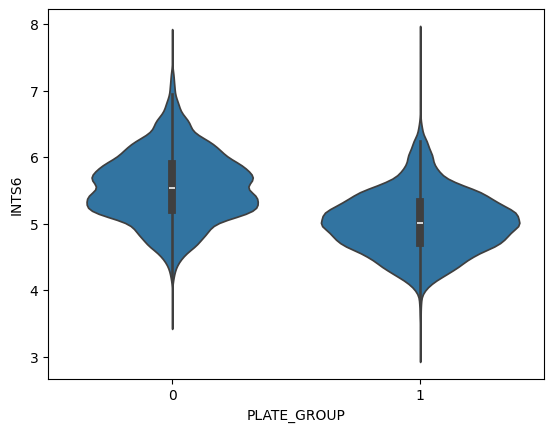

In [80]:
import seaborn as sns
gene = 'INTS6'
df = pd.DataFrame(data={gene:list(adata[:,gene].X.ravel()),'PLATE_GROUP':list(adata.obs['group_plate'])})
sns.violinplot(df,x='PLATE_GROUP',y=gene)

Index(['MALAT1', 'MT-RNR1', 'MT-RNR2', 'NEAT1', 'FN1', 'VIM', 'IGF2', 'GAPDH',
       'AKAP12', 'PDE4D'],
      dtype='object', name='gene_name')

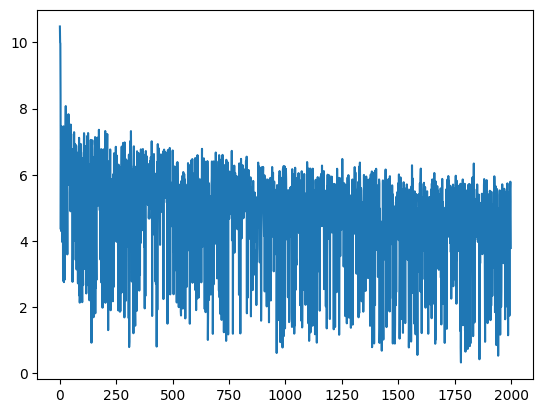

In [68]:
mean_exp = adata_cellline.X.mean(axis=0)
plt.plot(mean_exp)
adata_cellline.var_names[:10]

In [13]:
lst = os.listdir(folder)
bulkfiles = [f[:-9] for f in lst if f.endswith('_bulk.tsv')]
print(len(bulkfiles),'files')
print(bulkfiles)

75 files
['plate10_CVCL_0023', 'plate10_CVCL_0028', 'plate10_CVCL_0069', 'plate10_CVCL_0099', 'plate10_CVCL_0131', 'plate10_CVCL_0152', 'plate10_CVCL_0179', 'plate10_CVCL_0218', 'plate10_CVCL_0292', 'plate10_CVCL_0293', 'plate10_CVCL_0320', 'plate10_CVCL_0332', 'plate10_CVCL_0334', 'plate10_CVCL_0359', 'plate10_CVCL_0366', 'plate10_CVCL_0371', 'plate10_CVCL_0397', 'plate10_CVCL_0399', 'plate10_CVCL_0428', 'plate10_CVCL_0459', 'plate10_CVCL_0480', 'plate10_CVCL_0504', 'plate10_CVCL_0546', 'plate10_CVCL_1055', 'plate10_CVCL_1056', 'plate10_CVCL_1094', 'plate10_CVCL_1097', 'plate10_CVCL_1098', 'plate10_CVCL_1119', 'plate10_CVCL_1125', 'plate10_CVCL_1239', 'plate10_CVCL_1285', 'plate10_CVCL_1381', 'plate10_CVCL_1478', 'plate10_CVCL_1495', 'plate10_CVCL_1517', 'plate10_CVCL_1531', 'plate10_CVCL_1547', 'plate10_CVCL_1550', 'plate10_CVCL_1571', 'plate10_CVCL_1577', 'plate10_CVCL_1635', 'plate10_CVCL_1666', 'plate10_CVCL_1693', 'plate10_CVCL_1715', 'plate10_CVCL_1716', 'plate10_CVCL_1717', 'pl

In [36]:
merged_adata = None
for i,f in enumerate(bulkfiles):
    bulk_df = pd.read_csv(folder+f+'_bulk.tsv',sep='\t',index_col=0).T
    cellnumbers_df = pd.read_csv(folder+f+'_numberofcells.txt',sep='\t',index_col=0)
    valid_conditions = list(cellnumbers_df[cellnumbers_df['NUMBER_OF_CELLS']>100].index)
    print(i+1,f,len(bulk_df),len(valid_conditions))
    bulk_df = bulk_df.loc[valid_conditions]
    bulk_df.index = [f+'_'+vc for vc in valid_conditions]
    if merged_adata is None:
        merged_adata = an.AnnData(X=bulk_df)
    else:
        temp_adata = an.AnnData(X=bulk_df)
        merged_adata = sc.concat([merged_adata,temp_adata])
    #if i>10:
    #    break
    del bulk_df
    gc.collect()
merged_adata.write_h5ad(folder+'tahoe_bulk.h5ad',compression='gzip')

1 plate10_CVCL_0023 95 95
2 plate10_CVCL_0028 95 95
3 plate10_CVCL_0069 95 95
4 plate10_CVCL_0099 95 95
5 plate10_CVCL_0131 95 95
6 plate10_CVCL_0152 95 95
7 plate10_CVCL_0179 95 95
8 plate10_CVCL_0218 95 95
9 plate10_CVCL_0292 95 95
10 plate10_CVCL_0293 95 95
11 plate10_CVCL_0320 95 95
12 plate10_CVCL_0332 95 95
13 plate10_CVCL_0334 95 95
14 plate10_CVCL_0359 95 95
15 plate10_CVCL_0366 95 95
16 plate10_CVCL_0371 95 95
17 plate10_CVCL_0397 95 95
18 plate10_CVCL_0399 95 95
19 plate10_CVCL_0428 95 95
20 plate10_CVCL_0459 95 95
21 plate10_CVCL_0480 95 95
22 plate10_CVCL_0504 95 95
23 plate10_CVCL_0546 95 95
24 plate10_CVCL_1055 95 95
25 plate10_CVCL_1056 95 95
26 plate10_CVCL_1094 95 95
27 plate10_CVCL_1097 95 95
28 plate10_CVCL_1098 95 95
29 plate10_CVCL_1119 95 95
30 plate10_CVCL_1125 95 95
31 plate10_CVCL_1239 95 95
32 plate10_CVCL_1285 95 95
33 plate10_CVCL_1381 95 95
34 plate10_CVCL_1478 95 95
35 plate10_CVCL_1495 95 95
36 plate10_CVCL_1517 95 95
37 plate10_CVCL_1531 95 0
38 plate10_

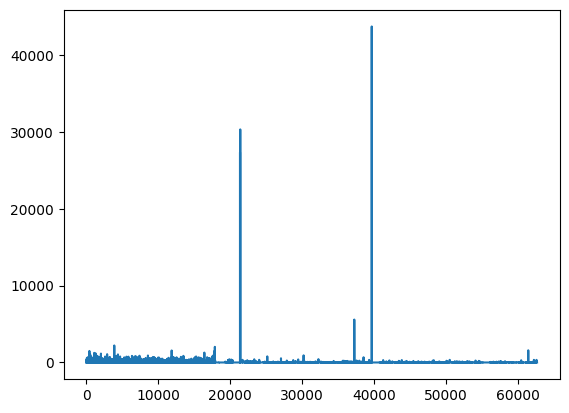

Index(['MT-RNR2', 'MT-RNR1', 'MALAT1'], dtype='object', name='gene_name')


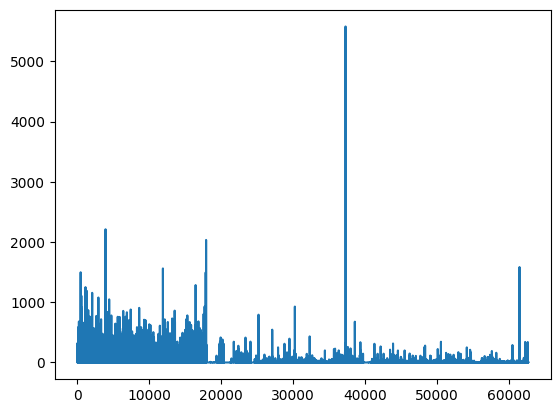

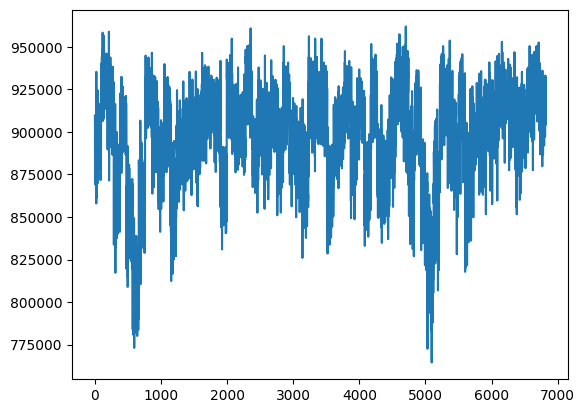

In [61]:
X = merged_adata.X
mns = np.mean(X,axis=0)
plt.plot(mns)
plt.show()
thresh = 10000
inds = np.where(mns>thresh)[0]
inds0 = np.where(mns<=thresh)[0]
print(merged_adata.var_names[inds])
X = merged_adata[:,inds0].X
mns = np.mean(X,axis=0)
plt.plot(mns)
plt.show()
sums = np.sum(X,axis=1)
plt.plot(sums)
plt.show()

In [33]:
display(bulk_df)
print(f)

gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,POLGARF,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,ENSG00000291316,TMEM276
Malotilate__0.05,3.0,0.0,145.0,21.0,45.0,0.0,8.0,49.0,47.0,83.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Ataluren__0.05,6.0,0.0,302.0,52.0,80.0,0.0,14.0,112.0,118.0,164.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
Talc__0.05,1.0,0.0,151.0,25.0,50.0,0.0,11.0,50.0,55.0,61.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
Darolutamide__0.05,7.0,0.0,359.0,46.0,90.0,0.0,9.0,96.0,109.0,148.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0
Cyclosporin A__0.05,5.0,0.0,366.0,55.0,89.0,0.0,6.0,131.0,127.0,235.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clopidogrel__0.05,0.0,0.0,363.0,30.0,72.0,0.0,14.0,117.0,100.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
Delamanid__0.05,1.0,0.0,268.0,40.0,92.0,0.0,9.0,79.0,76.0,130.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
Trametinib__0.05,1.0,0.0,235.0,53.0,82.0,0.0,11.0,107.0,90.0,117.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
Cabozantinib (S-malate)__0.05,0.0,0.0,133.0,28.0,50.0,0.0,9.0,50.0,49.0,76.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0


plate10_CVCL_0131


In [62]:
sc.pp.normalize_total(merged_adata, target_sum=1000000)
top_variable_genes = 2000
vars = np.var(merged_adata.X,axis=0)
inds = np.flip(np.argsort(vars))
ind_genes = inds[0:top_variable_genes]
if 0 in vars[ind_genes]:
    ind_first_zero = np.argwhere(vars[ind_genes]==0)[0][0]
    ind_genes = ind_genes[0:ind_first_zero]
adata_bulk = merged_adata[:,ind_genes]
sc.pp.log1p(adata_bulk)
display(adata_bulk)
sc.tl.pca(adata_bulk)


/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 6821 × 2000
    obs: 'plate', 'cellline', 'drug', 'drugconc'
    uns: 'log1p'

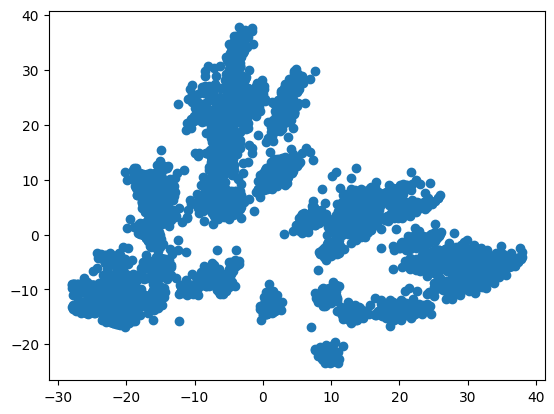

In [43]:
xpca = adata_bulk.obsm['X_pca']
#k = list(df.columns).index('DMSO_TF__0.0')
plt.scatter(xpca[:,0],xpca[:,1])
#plt.scatter(xpca[k,0],xpca[k,1],s=100)


/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


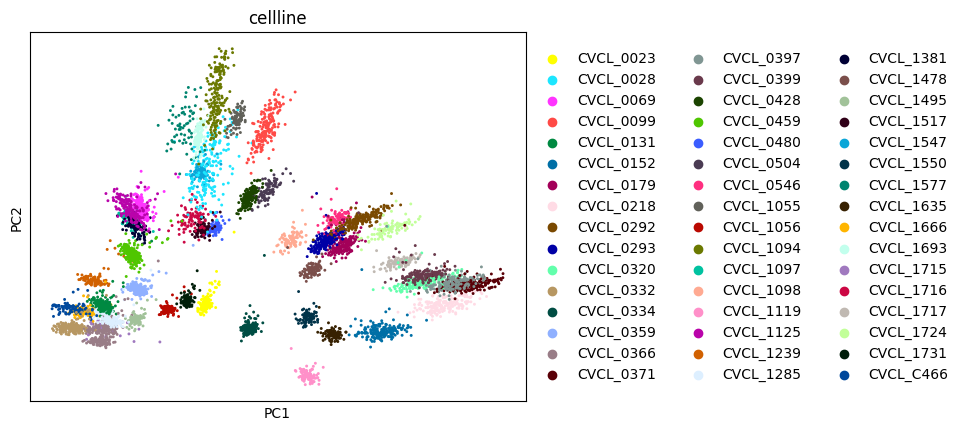

/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zinovyev/anaconda3/envs/singlecell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


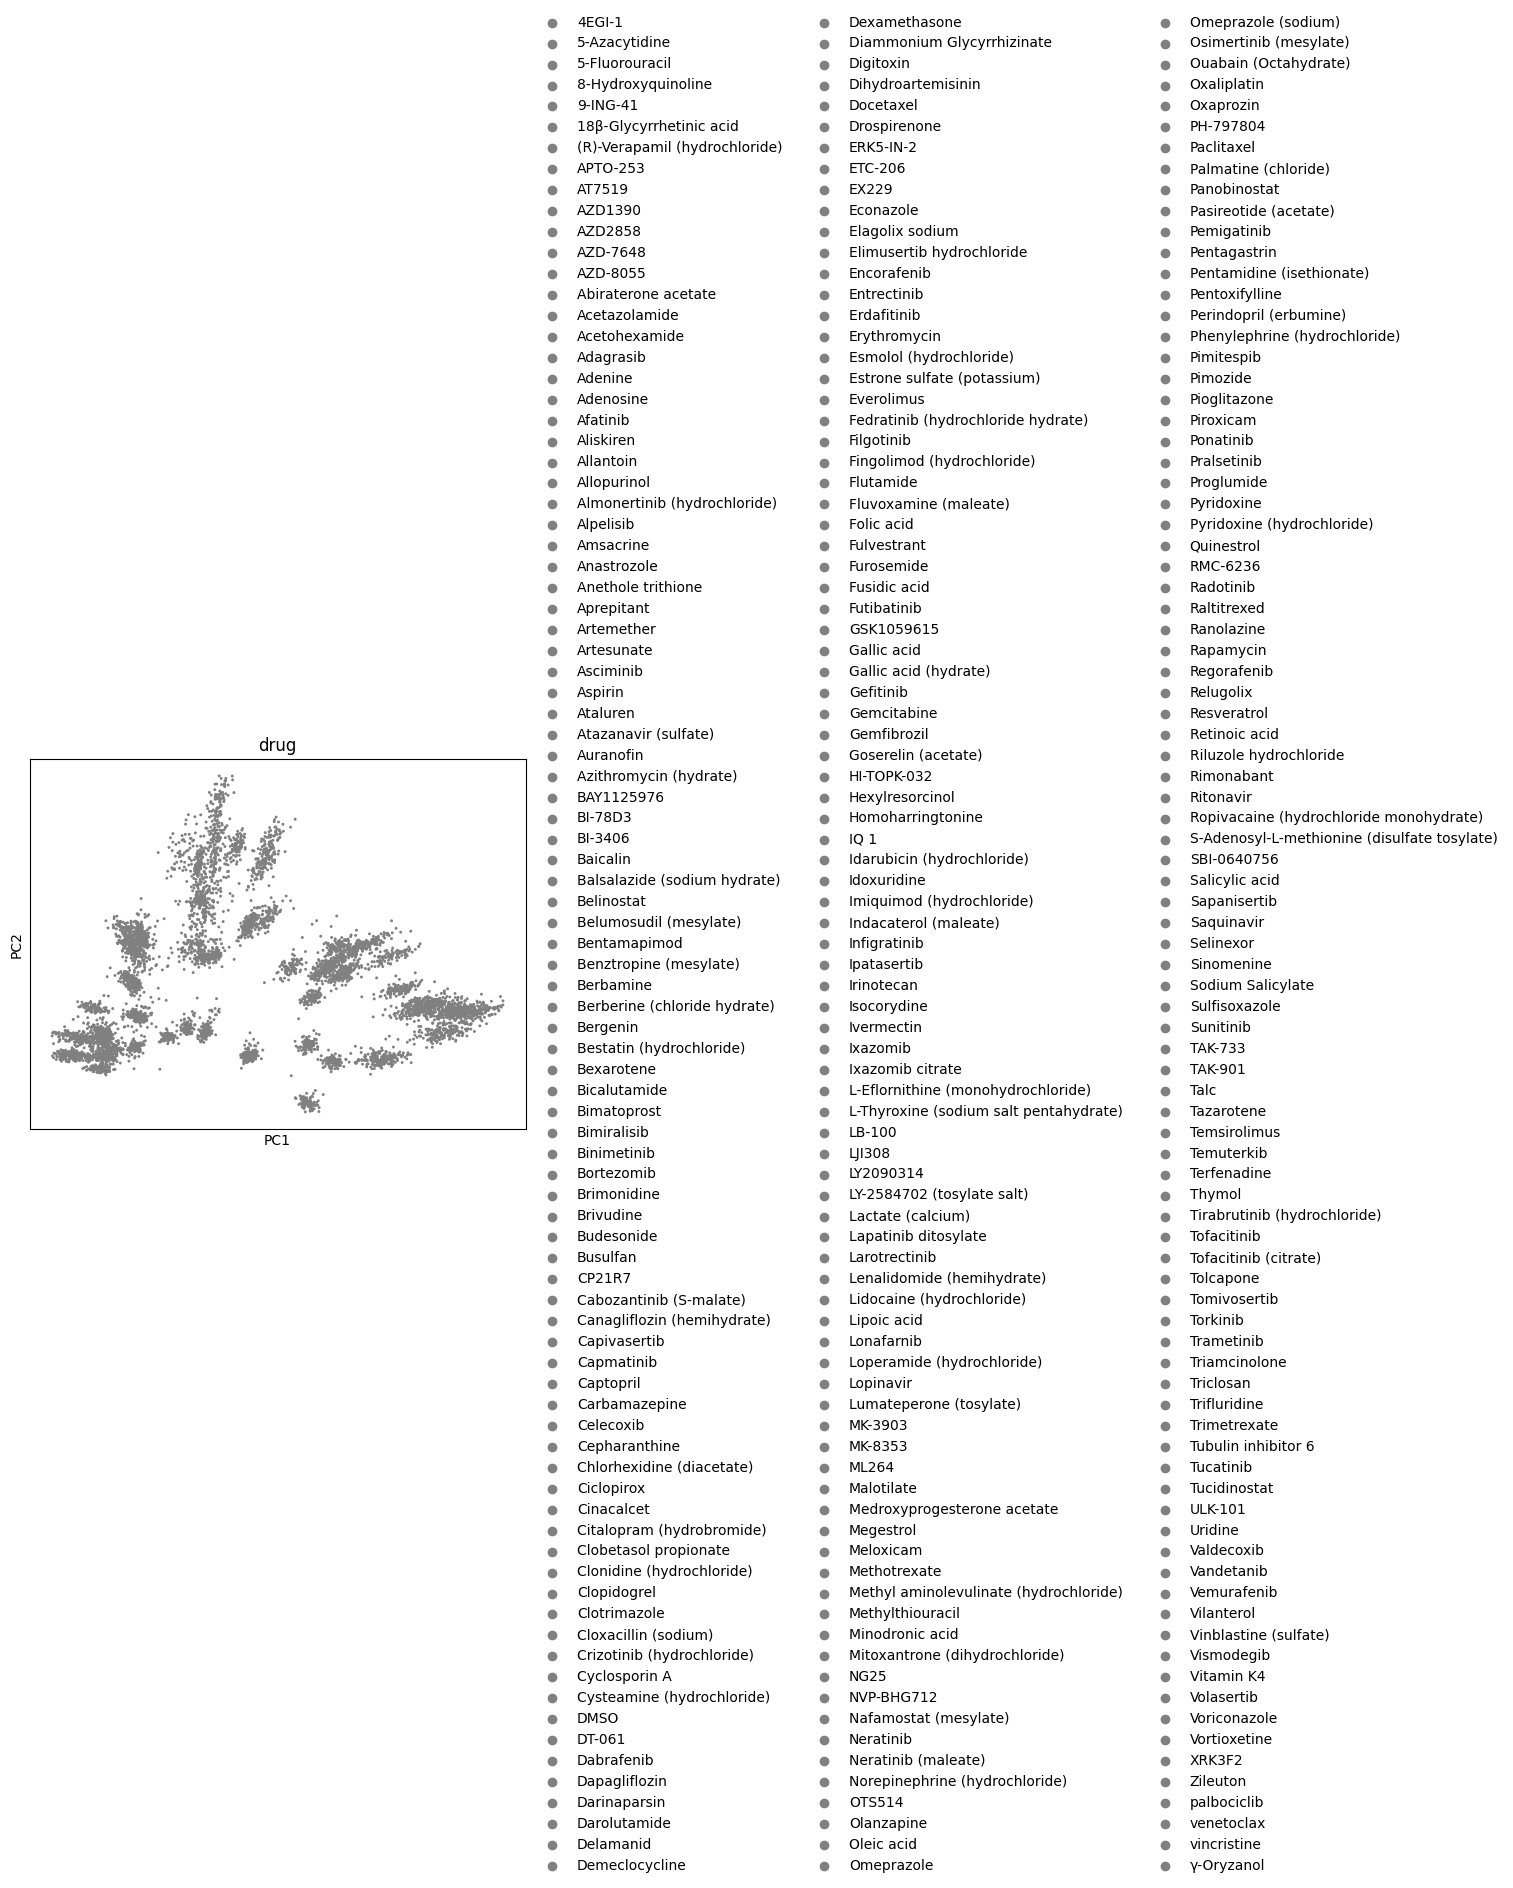

In [59]:
merged_adata.obs['plate'] = [s.split('_')[0] for s in merged_adata.obs_names]
adata_bulk.obs['plate'] = merged_adata.obs['plate']
merged_adata.obs['cellline'] = [s.split('_')[1]+'_'+s.split('_')[2] for s in merged_adata.obs_names]
adata_bulk.obs['cellline'] = merged_adata.obs['cellline']
merged_adata.obs['drug'] = [s.split('_')[3] for s in merged_adata.obs_names]
adata_bulk.obs['drug'] = merged_adata.obs['drug']
merged_adata.obs['drugconc'] = [s.split('_')[3]+s.split('_')[4] for s in merged_adata.obs_names]
adata_bulk.obs['drugconc'] = merged_adata.obs['drugconc']
sc.pl.pca(adata_bulk,color='cellline')
sc.pl.pca(adata_bulk,color='drug')

In [99]:
cellline = 'CVCL_0023'
!gsutil -m cp gs://tahoe100m_bycelllines/*{cellline}*.h5ad ./tahoe-100/data/

Copying gs://tahoe100m_bycelllines/plate10_CVCL_0023.h5ad...
Copying gs://tahoe100m_bycelllines/plate11_CVCL_0023.h5ad...                    
Copying gs://tahoe100m_bycelllines/plate12_CVCL_0023.h5ad...                    
Copying gs://tahoe100m_bycelllines/plate13_CVCL_0023.h5ad...
Copying gs://tahoe100m_bycelllines/plate1_CVCL_0023.h5ad...                     
Copying gs://tahoe100m_bycelllines/plate14_CVCL_0023.h5ad...                    
Copying gs://tahoe100m_bycelllines/plate2_CVCL_0023.h5ad...
Copying gs://tahoe100m_bycelllines/plate3_CVCL_0023.h5ad...
Copying gs://tahoe100m_bycelllines/plate4_CVCL_0023.h5ad...                     
Copying gs://tahoe100m_bycelllines/plate5_CVCL_0023.h5ad...                     
Copying gs://tahoe100m_bycelllines/plate6_CVCL_0023.h5ad...                     
Copying gs://tahoe100m_bycelllines/plate7_CVCL_0023.h5ad...                     
Copying gs://tahoe100m_bycelllines/plate9_CVCL_0023.h5ad...                     
Copying gs://tahoe100m_bycell

In [101]:
folder = 'tahoe-100/data/'
lst = os.listdir(folder)
files = [f for f in lst if cellline in f]


['plate10_CVCL_0023.h5ad_.gstmp', 'plate11_CVCL_0023.h5ad_.gstmp', 'plate12_CVCL_0023.h5ad_.gstmp', 'plate13_CVCL_0023.h5ad_.gstmp', 'plate14_CVCL_0023.h5ad_.gstmp', 'plate1_CVCL_0023.h5ad_.gstmp', 'plate2_CVCL_0023.h5ad_.gstmp', 'plate3_CVCL_0023.h5ad_.gstmp', 'plate4_CVCL_0023.h5ad_.gstmp', 'plate5_CVCL_0023.h5ad_.gstmp', 'plate6_CVCL_0023.h5ad_.gstmp', 'plate7_CVCL_0023.h5ad_.gstmp', 'plate8_CVCL_0023.h5ad_.gstmp', 'plate9_CVCL_0023.h5ad_.gstmp']
